# Marketing Insights for E-Commerce Company

**Marketing Insights for an E-Commerce Company** involves analyzing customer behavior, sales data, and market trends to optimize marketing strategies. 

**Key points include:**

- **Identifying key demographics**
- **Understanding purchasing patterns**
- **Segmenting customers for targeted campaigns**

**Benefits:**

- **Improves customer retention**
- **Increases conversion rates**
- **Maximizes ROI on marketing spend**

**Leveraging data analytics tools and techniques, businesses can make informed decisions to enhance their overall marketing effectiveness.**


In [1]:
#Importing reqired libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
from scipy.stats import pearsonr,spearmanr
import warnings
warnings.filterwarnings("ignore")

### Loading the data

In [2]:
customers_data = pd.read_csv("Customers.csv")

In [3]:
customers_data.head()

,CustomerID,Gender,Location,Tenure_Months
0,17850,M,Chicago,12
1,13047,M,California,43
2,12583,M,Chicago,33
3,13748,F,California,30
4,15100,M,California,49


In [4]:
customers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1468 non-null   int64 
 1   Gender         1468 non-null   object
 2   Location       1468 non-null   object
 3   Tenure_Months  1468 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.0+ KB


In [5]:
#converting customer id to string
customers_data['CustomerID']=customers_data['CustomerID'].astype(str)

In [6]:
customers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1468 non-null   object
 1   Gender         1468 non-null   object
 2   Location       1468 non-null   object
 3   Tenure_Months  1468 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 46.0+ KB


In [7]:
discount_coupon = pd.read_csv("Discount_Coupon.csv")
discount_coupon.head()

,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20


In [8]:
discount_coupon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Month             204 non-null    object
 1   Product_Category  204 non-null    object
 2   Coupon_Code       204 non-null    object
 3   Discount_pct      204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB


In [9]:
marketing_spend = pd.read_csv("Marketing_Spend.csv")
marketing_spend.head()

,Date,Offline_Spend,Online_Spend
0,1/1/2019,4500,2424.50
1,1/2/2019,4500,3480.36
2,1/3/2019,4500,1576.38
3,1/4/2019,4500,2928.55
4,1/5/2019,4500,4055.30


In [10]:
marketing_spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           365 non-null    object 
 1   Offline_Spend  365 non-null    int64  
 2   Online_Spend   365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB


In [11]:
# Converting the datatype of Date column from "object to datatime" 

marketing_spend.Date = pd.to_datetime(marketing_spend["Date"])

In [12]:
marketing_spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           365 non-null    datetime64[ns]
 1   Offline_Spend  365 non-null    int64         
 2   Online_Spend   365 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 8.7 KB


In [13]:
online_sale = pd.read_csv("Online_Sales.csv")
online_sale.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
1,17850,16680,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
2,17850,16681,1/1/2019,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used
3,17850,16682,1/1/2019,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used
4,17850,16682,1/1/2019,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used


In [14]:
online_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52924 non-null  int64  
 1   Transaction_ID       52924 non-null  int64  
 2   Transaction_Date     52924 non-null  object 
 3   Product_SKU          52924 non-null  object 
 4   Product_Description  52924 non-null  object 
 5   Product_Category     52924 non-null  object 
 6   Quantity             52924 non-null  int64  
 7   Avg_Price            52924 non-null  float64
 8   Delivery_Charges     52924 non-null  float64
 9   Coupon_Status        52924 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 4.0+ MB


- Converting the 'CustomerID' and 'Transaction_ID' columns to string type, Converting the 'Transaction_Date' column to a datetime format, and extracts the month from 'Transaction_Date', storing it in a new 'Month' column.

In [15]:

online_sale['CustomerID']=online_sale['CustomerID'].astype(str)
online_sale['Transaction_ID']=online_sale['Transaction_ID'].astype(str)
online_sale['Transaction_Date'] = pd.to_datetime(online_sale['Transaction_Date'], format='%m/%d/%Y')
online_sale['Month'] = online_sale['Transaction_Date'].dt.strftime('%b')

In [16]:
online_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52924 non-null  object        
 1   Transaction_ID       52924 non-null  object        
 2   Transaction_Date     52924 non-null  datetime64[ns]
 3   Product_SKU          52924 non-null  object        
 4   Product_Description  52924 non-null  object        
 5   Product_Category     52924 non-null  object        
 6   Quantity             52924 non-null  int64         
 7   Avg_Price            52924 non-null  float64       
 8   Delivery_Charges     52924 non-null  float64       
 9   Coupon_Status        52924 non-null  object        
 10  Month                52924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 4.4+ MB


In [17]:
tax_amount = pd.read_csv("Tax_amount.csv")
tax_amount.head()

,Product_Category,GST
0,Nest-USA,10%
1,Office,10%
2,Apparel,18%
3,Bags,18%
4,Drinkware,18%


In [18]:
tax_amount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product_Category  20 non-null     object
 1   GST               20 non-null     object
dtypes: object(2)
memory usage: 448.0+ bytes


In [19]:
# Ensure the GST column is treated as strings, replace '%', convert to float, and divide by 100
tax_amount['GST'] = tax_amount['GST'].astype(str).str.replace('%', '').astype(float) / 100

tax_amount.head()

,Product_Category,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18


# Calculate Invoice amount or sale_amount or revenue for each transaction and item level.

**Invoice Value = ((Quantity * Avg_price) * (1 - Discount_pct) * (1 + GST)) + Delivery_Charges**

In [20]:
online_sale.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,Jan
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,Jan
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,Jan


In [21]:
discount_coupon.head()

,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20


In [22]:
result = pd.merge(online_sale, discount_coupon, on=['Month', 'Product_Category'], how='left')
merged_df = pd.merge(result,tax_amount,on=['Product_Category'], how = 'left')

In [23]:
merged_df['Coupon_Code'].fillna('Not Available',inplace=True)
merged_df['Discount_pct'].fillna(0, inplace=True)

In [24]:
merged_df['Invoice'] = np.where(
    merged_df['Coupon_Status'] == 'Used',
    ((merged_df['Quantity'] * merged_df['Avg_Price']) * (1 - merged_df['Discount_pct']/100) * (1 + merged_df['GST'])) + merged_df['Delivery_Charges'],
    ((merged_df['Quantity'] * merged_df['Avg_Price']) * (1 + merged_df['GST'])) + merged_df['Delivery_Charges'])

In [25]:
merged_df.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct,GST,Invoice
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,0.10,158.6729
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,0.10,158.6729
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,Jan,OFF10,10.0,0.10,8.5295
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,Jan,SALE10,10.0,0.18,109.9270
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,Jan,AIO10,10.0,0.18,24.0230


# Exploratory Data Analysis

In [26]:
merged_df.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct,GST,Invoice
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,0.10,158.6729
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,0.10,158.6729
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,Jan,OFF10,10.0,0.10,8.5295
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,Jan,SALE10,10.0,0.18,109.9270
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,Jan,AIO10,10.0,0.18,24.0230


In [27]:
merged_df["Invoice"].describe()

count    52924.000000
mean       101.983198
std        172.365729
min          4.603500
25%         20.160000
50%         45.636200
75%        137.400000
max       8979.275000
Name: Invoice, dtype: float64

In [28]:
# Understanding how many customers acquired every month ( for acquisition, check if the customer is placing their first order in the given month)
merged_df['Month2'] = pd.to_datetime(merged_df['Month'], format='%b')
merged_df.groupby('Month2')['CustomerID'].count()
customer_count_by_month = merged_df.groupby('Month2')['CustomerID'].nunique()
customer_count_by_month

Month2
1900-01-01    215
1900-02-01    109
1900-03-01    208
1900-04-01    224
1900-05-01    200
1900-06-01    259
1900-07-01    236
1900-08-01    300
1900-09-01    193
1900-10-01    210
1900-11-01    188
1900-12-01    236
Name: CustomerID, dtype: int64

In [29]:
merged_df['Month2']

0       1900-01-01
1       1900-01-01
2       1900-01-01
3       1900-01-01
4       1900-01-01
           ...    
52919   1900-12-01
52920   1900-12-01
52921   1900-12-01
52922   1900-12-01
52923   1900-12-01
Name: Month2, Length: 52924, dtype: datetime64[ns]

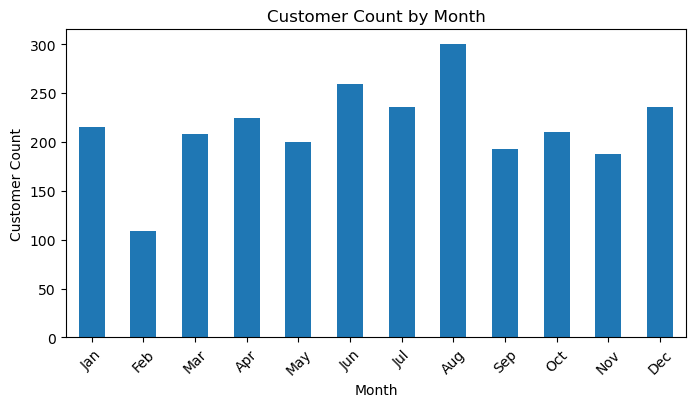

In [30]:
plt.figure(figsize=(8, 4))
customer_count_by_month.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Customer Count')
plt.title('Customer Count by Month')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()

The plot shows that the **highest customer count occurs in August** and the **lowest in February.** There is `an upward trend from February to May, followed by a peak in August and a drop in September.` Customer counts stabilize from October to December with a slight increase in December.

In [31]:
merged_df['Month'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [32]:
# Understand the retention of customers on a month-on-month basis
month_dict = {}
for i in merged_df['Month'].unique():
   month_dict[i] = merged_df[merged_df['Month']==i]['CustomerID'].unique().tolist() #filtering out unique customers for a given month

In [33]:
#month_dict

In [34]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
retention = [0]
for i in range(11):
  set1 = set(month_dict[months[i]]) #getting list of customer for a given month
  set2 = set(month_dict[months[i+1]]) #getting list of customers for the next month
  common_items = len(set1.intersection(set2)) #counting customers that were present in the current as well as next month
  retention.append(common_items)

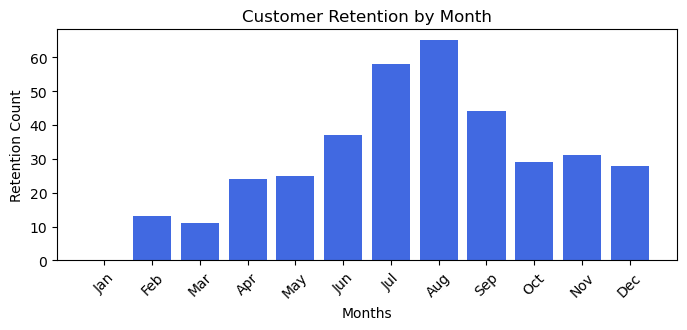

In [35]:
plt.figure(figsize=(8, 3))
plt.bar(months, retention, color='royalblue')
plt.xlabel('Months')
plt.ylabel('Retention Count')
plt.title('Customer Retention by Month')
plt.xticks(rotation=45)
plt.show()

**Key Insights:**

* Analyze slice sizes to understand customer satisfaction distribution. This reveals how well your product or service meets expectations.
* Focus on improving areas with lower satisfaction ratings (e.g., "Neutral" or "Dissatisfied"). Investigate reasons behind these responses.

**Inferences:** June, July, August, September months has the highest retention rate compared to all other months.

In [36]:
# How the revenues from existing/new customers on a month-on-month basis
temp = [] #Variable to store each unique customer who has visited the store
new_cust_each_month = {}
existing_cust_each_month = {}

no_of_new_cust_each_month = {}
no_of_existing_cust_each_month = {}

for i in merged_df['Month'].unique():
   x = merged_df[merged_df['Month']==i]['CustomerID'].unique().tolist()
   new_cust = [value for value in x if value not in temp]
   existing_cust = [value for value in x if value in temp]
   temp.extend(x)
   temp = list(set(temp))
   new_cust_each_month[i] = new_cust
   existing_cust_each_month[i] = existing_cust
   no_of_new_cust_each_month[i] = len(new_cust)
   no_of_existing_cust_each_month[i] = len(existing_cust)

In [37]:
# print("new_cust_each_month", new_cust_each_month)
# print("existing_cust_each_month", existing_cust_each_month)
# print("no_of_new_cust_each_month", no_of_new_cust_each_month)
# print("no_of_existing_cust_each_month", no_of_existing_cust_each_month)

In [38]:
months = list(no_of_new_cust_each_month.keys())
new_cust = list(no_of_new_cust_each_month.values())
existing_cust = list(no_of_existing_cust_each_month.values())

In [39]:
months

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

In [40]:
new_cust

[215, 96, 177, 163, 112, 137, 94, 135, 78, 87, 68, 106]

In [41]:
existing_cust

[0, 13, 31, 61, 88, 122, 142, 165, 115, 123, 120, 130]

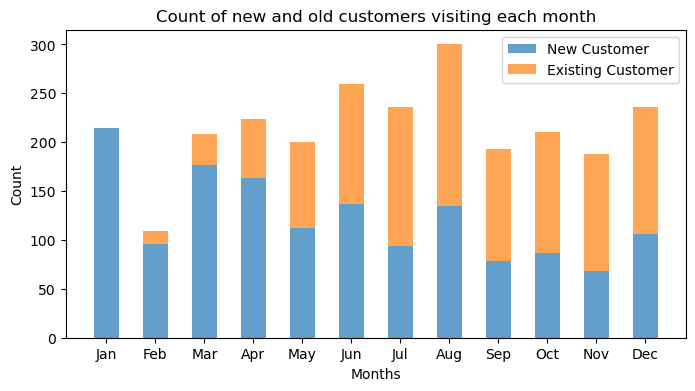

In [42]:
plt.figure(figsize=(8, 4))
bar_positions = range(len(months))

plt.bar(bar_positions, new_cust, width=0.5, label='New Customer', alpha=0.7)
plt.bar(bar_positions, existing_cust, width=0.5, bottom=new_cust, label='Existing Customer', alpha=0.7)

plt.xlabel('Months')
plt.ylabel('Count')
plt.title('Count of new and old customers visiting each month')
plt.xticks(bar_positions, months)
plt.legend()
plt.show()

- Untill the month **June the company saw huge inflow of new customers** and after the month **June it was the exsiting customers had a high inflow** to the store.

In [43]:
new_cust_each_month_revenue = {}
existing_cust_each_month_revenue = {}

for month, ids in new_cust_each_month.items():
    new_cust_each_month_revenue[month] = merged_df[(merged_df['Month'] == month) & (merged_df['CustomerID'].isin(ids))]['Invoice'].sum()

for month, ids in existing_cust_each_month.items():
    existing_cust_each_month_revenue[month] = merged_df[(merged_df['Month'] == month) & (merged_df['CustomerID'].isin(ids))]['Invoice'].sum()

In [44]:
new_cust_each_month_revenue

{'Jan': 494090.5487500001,
 'Feb': 328637.45408000005,
 'Mar': 346227.54936,
 'Apr': 281512.70192,
 'May': 233257.28268,
 'Jun': 217334.50767999998,
 'Jul': 180362.68404000002,
 'Aug': 228883.77692000003,
 'Sep': 162478.53499,
 'Oct': 257474.16682,
 'Nov': 234631.52196000004,
 'Dec': 263414.92764}

In [45]:
existing_cust_each_month_revenue

{'Jan': 0.0,
 'Feb': 46524.59322,
 'Mar': 68930.24108,
 'Apr': 195985.8891,
 'May': 132338.74688,
 'Jun': 143665.66661000001,
 'Jul': 271515.72500000003,
 'Aug': 246913.09862,
 'Sep': 234031.95755,
 'Oct': 223293.20299,
 'Nov': 313156.6043,
 'Dec': 292697.36415000004}

In [46]:
months = list(existing_cust_each_month_revenue.keys())
new_cust = list(new_cust_each_month_revenue.values())
existing_cust = list(existing_cust_each_month_revenue.values())

In [47]:
months

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

In [48]:
new_cust

[494090.5487500001,
 328637.45408000005,
 346227.54936,
 281512.70192,
 233257.28268,
 217334.50767999998,
 180362.68404000002,
 228883.77692000003,
 162478.53499,
 257474.16682,
 234631.52196000004,
 263414.92764]

In [49]:
existing_cust

[0.0,
 46524.59322,
 68930.24108,
 195985.8891,
 132338.74688,
 143665.66661000001,
 271515.72500000003,
 246913.09862,
 234031.95755,
 223293.20299,
 313156.6043,
 292697.36415000004]

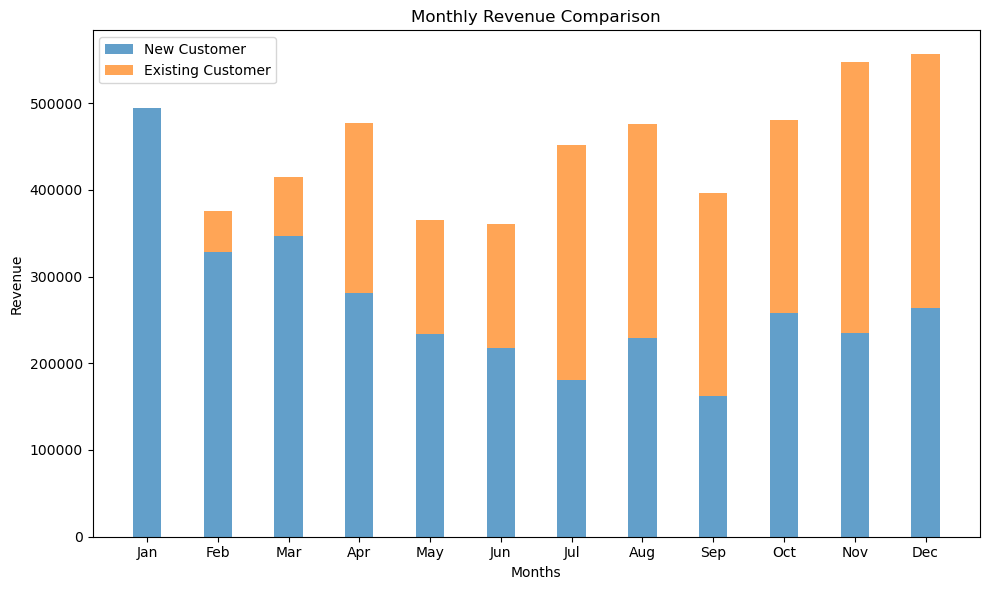

In [50]:
# Define bar_width
bar_width = 0.4

plt.figure(figsize=(10, 6))

bar_positions = range(len(months))

plt.bar(bar_positions, new_cust, width=bar_width, label='New Customer', alpha=0.7)
plt.bar(bar_positions, existing_cust, width=bar_width, bottom=new_cust, label='Existing Customer', alpha=0.7)

plt.xlabel('Months')
plt.ylabel('Revenue')
plt.title('Monthly Revenue Comparison')
plt.xticks(bar_positions, months)
plt.legend()

plt.tight_layout()
plt.show()

Untill the month **June new customers contributed more to the revenue** and after **june Existing customers were the highest contributers to the revenue** with an exception case that happened in **october**.

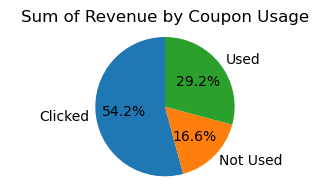

In [51]:
# How the discounts play a role in the revenues
grouped = merged_df.groupby('Coupon_Status')['Invoice'].sum()

# Create a pie chart
plt.figure(figsize=(4,2))
plt.pie(grouped, labels=grouped.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

plt.title('Sum of Revenue by Coupon Usage')

plt.show()

The largest portion of revenue (54.2%) comes from customers who **clicked on a coupon** but did not necessarily use it.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'GGOEGGOA017399'),
  Text(1, 0, 'GGOEGDHC018299'),
  Text(2, 0, 'GGOEGBMJ013399'),
  Text(3, 0, 'GGOEGOLC014299'),
  Text(4, 0, 'GGOEGFKQ020399'),
  Text(5, 0, 'GGOEGFSR022099'),
  Text(6, 0, 'GGOENEBQ078999'),
  Text(7, 0, 'GGOEGFYQ016599'),
  Text(8, 0, 'GGOEGOAQ012899'),
  Text(9, 0, 'GGOENEBJ079499')])

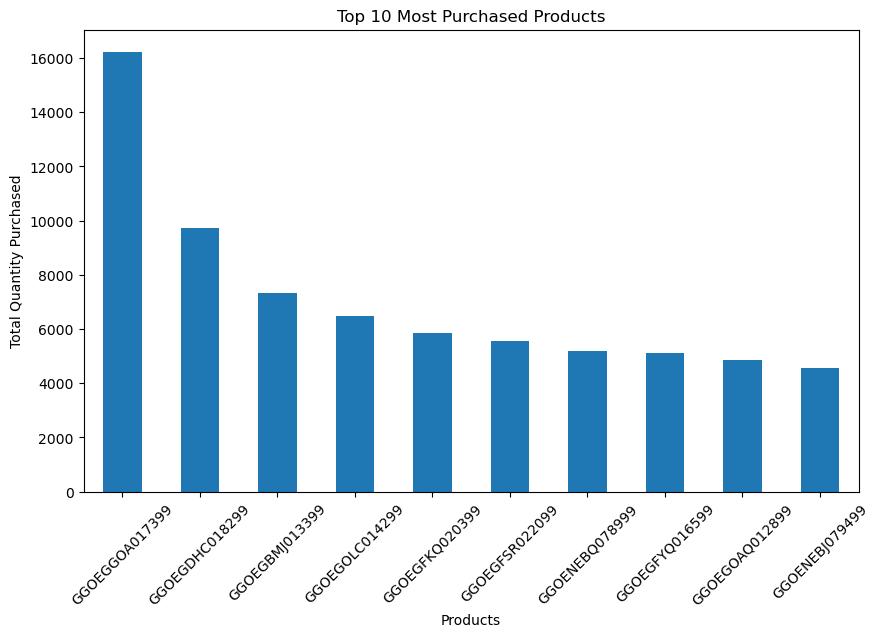

In [52]:
# Which product was purchased mostly based on the quantity

category_quantity = merged_df.groupby('Product_SKU')['Quantity'].sum()

# Find the category with the highest total quantity
top_10_categories = category_quantity.sort_values(ascending=False).head(10)

# Create a bar chart for the top 10 products
plt.figure(figsize=(10, 6))
top_10_categories.plot(kind='bar')
plt.xlabel('Products')
plt.ylabel('Total Quantity Purchased')
plt.title('Top 10 Most Purchased Products')
plt.xticks(rotation=45)

The **Product_SKU of 'GGOEGGOA017399'** occupied as the most purchased in large number of quantity of **more than 16k**

In [53]:
top10 = top_10_categories.reset_index()
filtered_df = merged_df[merged_df['Product_SKU'].isin(top10['Product_SKU'])]

# Group by 'product_id' and calculate summary statistics
summary_stats = filtered_df.groupby('Product_SKU').agg({
    'Product_Description': 'first',
    'Product_Category': 'first'  ,
     'Quantity': 'sum',
    'Invoice': 'sum'
}).reset_index()
summary_stats.columns = ['Product ID', 'Product Description', 'Product Category','Quantity','Revenue']

# Display the summary statistics DataFrame
summary_stats

,Product ID,Product Description,Product Category,Quantity,Revenue
0,GGOEGBMJ013399,Sport Bag,Bags,7321,42068.25962
1,GGOEGDHC018299,Google 22 oz Water Bottle,Drinkware,9728,37418.94532
2,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,5847,24533.63450
3,GGOEGFSR022099,Google Kick Ball,Lifestyle,5549,15676.89884
4,GGOEGFYQ016599,Foam Can and Bottle Cooler,Drinkware,5098,11559.08054
5,GGOEGGOA017399,Maze Pen,Office,16234,19786.07210
6,GGOEGOAQ012899,Ballpoint LED Light Pen,Office,4861,15697.98510
7,GGOEGOLC014299,Google Metallic Notebook Set,Office,6496,41481.37750
8,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,4570,731870.69120
9,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,5206,671620.06650


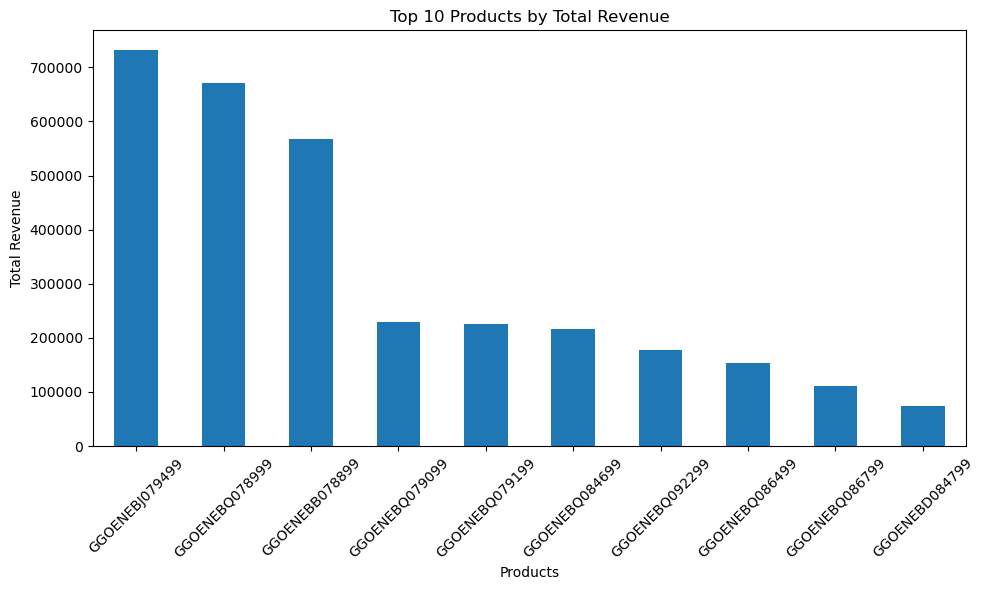

In [54]:
# Calculate total revenue per product
category_revenue = merged_df.groupby('Product_SKU')['Invoice'].sum()

# Find the top 10 products with the highest total revenue
top_10_revenue_products = category_revenue.sort_values(ascending=False).head(10)

# Create a bar chart for the top 10 revenue products
plt.figure(figsize=(10, 6))
top_10_revenue_products.plot(kind='bar')
plt.xlabel('Products')
plt.ylabel('Total Revenue')
plt.title('Top 10 Products by Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Key Observations:**

* Analyze the overall slope of the stacked bars to identify trends in total sales (increasing, decreasing, or steady) over several weeks. 
* Compare sales trends between the two categories/channels by examining the relative heights of the stacked sections within each bar.

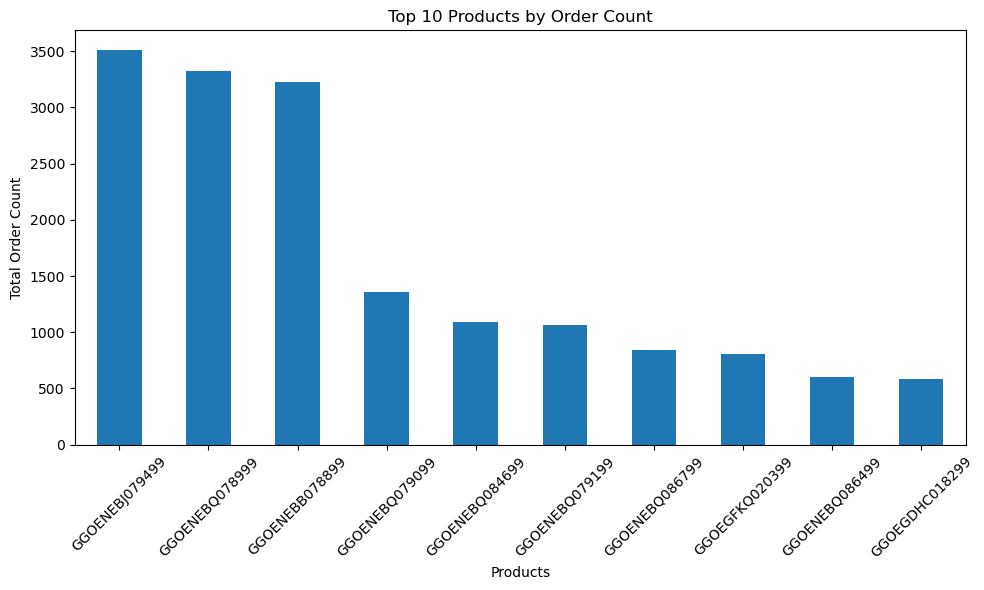

In [55]:
product_order_count = merged_df['Product_SKU'].value_counts().head(10)

# Create a bar chart for the top 10 products by order count
plt.figure(figsize=(10, 6))
product_order_count.plot(kind='bar')
plt.xlabel('Products')
plt.ylabel('Total Order Count')
plt.title('Top 10 Products by Order Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Key Observations:**

* The chart provides a snapshot of the most frequently ordered products. The product with the highest order count (GGOENEBJ079499) appears to be the most popular among customers during the analyzed period.
* The order count gradually decreases for products ranked lower, indicating a variety of product popularity levels.

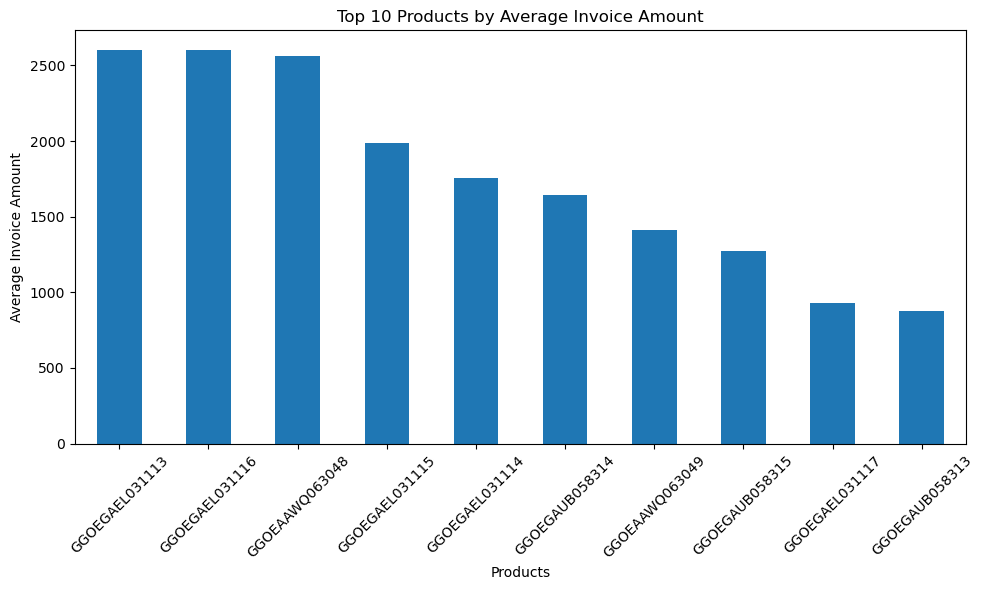

In [56]:
average_invoice = merged_df.groupby('Product_SKU')['Invoice'].mean()

# Find the top 10 products with highest average invoice
top_10_products = average_invoice.sort_values(ascending=False).head(10)

# Create a bar chart for the top 10 products based on average invoice
plt.figure(figsize=(10, 6))
top_10_products.plot(kind='bar')
plt.xlabel('Products')
plt.ylabel('Average Invoice Amount')
plt.title('Top 10 Products by Average Invoice Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Key Observations:**

* The graph reveals how daily average revenue for various products fluctuates over time.
* Analyze line slopes to identify products with increasing or decreasing revenue, potentially indicating popularity shifts, marketing effectiveness, or seasonal trends.
* Line comparisons reveal products with the highest or lowest average daily revenue.

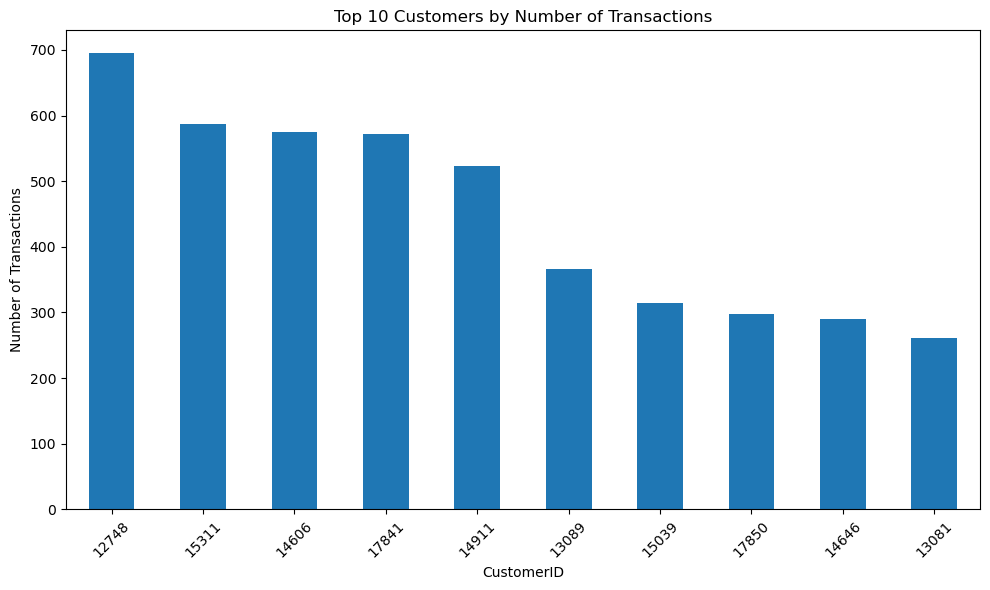

In [57]:
# Group by CustomerID and count transactions
customer_transaction_count = merged_df.groupby('CustomerID').size()

# Find the top 10 customers with the highest transaction count
top_10_customers = customer_transaction_count.sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
top_10_customers.plot(kind='bar')
plt.xlabel('CustomerID')
plt.ylabel('Number of Transactions')
plt.title('Top 10 Customers by Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Key observations:**

* The top customer (ID: 17850) exhibits a significantly higher transaction frequency compared to others, suggesting high engagement.
* A drop-off in transaction frequency is evident after the top customer, indicating a variety of customer engagement levels.

In [58]:
merged_df.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Month', 'Coupon_Code',
       'Discount_pct', 'GST', 'Invoice', 'Month2'],
      dtype='object')

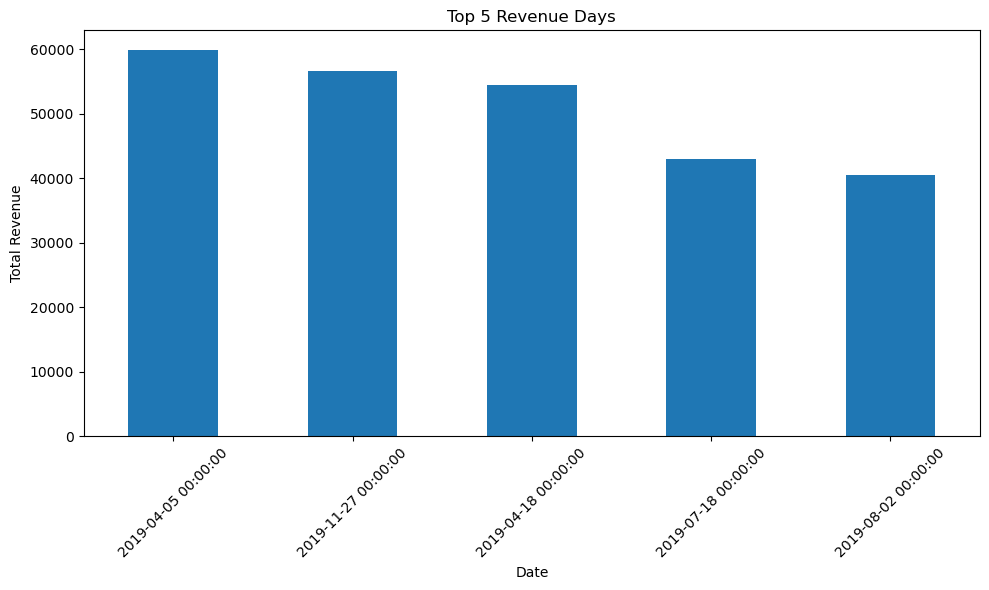

In [59]:
# Group by Date and sum the Invoice amounts
revenue_per_day = merged_df.groupby('Transaction_Date')['Invoice'].sum()

# Find the top 5 revenue days
top_5_revenue_days = revenue_per_day.sort_values(ascending=False).head(5)

# Plotting
plt.figure(figsize=(10, 6))
top_5_revenue_days.plot(kind='bar')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.title('Top 5 Revenue Days')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Highest Revenue Day:** April 5, 2019, generated the highest revenue, slightly above 60,000.

**Second Highest Revenue Day:** November 27, 2019, is the second highest with revenue slightly below 60,000.

**Other High Revenue Days:** April 18, 2019, July 18, 2019, and August 2, 2019, follow in descending order of revenue, with amounts decreasing progressively.

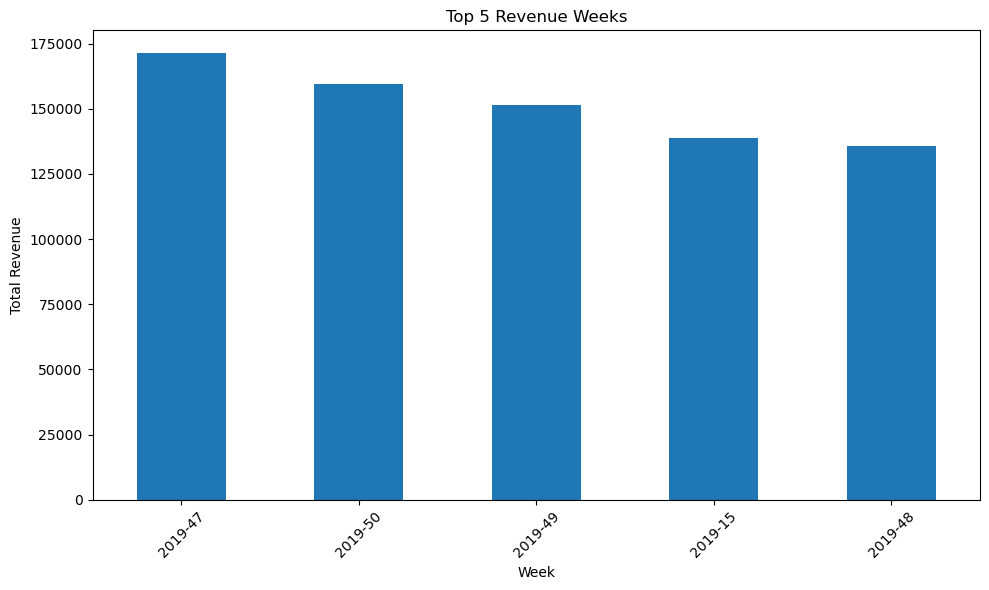

In [60]:
merged_df['Week'] = merged_df['Transaction_Date'].dt.strftime('%Y-%U')

# Group by Week and sum the Invoice amounts
revenue_per_week = merged_df.groupby('Week')['Invoice'].sum()

# Find the top 5 revenue weeks
top_5_revenue_weeks = revenue_per_week.sort_values(ascending=False).head(5)

# Plotting
plt.figure(figsize=(10, 6))
top_5_revenue_weeks.plot(kind='bar')
plt.xlabel('Week')
plt.ylabel('Total Revenue')
plt.title('Top 5 Revenue Weeks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insights:**

* Week 47 of 2019 recorded the highest revenue at approximately 175,000.
* Week 50 of 2019 and Week 49 of 2019 followed, with revenues slightly above 150,000.
* Week 15 of 2019 saw a revenue close to 140,000, placing it in fourth position.
* Week 48 of 2019 had the fifth highest revenue, slightly above 125,000.
These insights suggest that the **`last quarter of 2019 was particularly strong in terms of revenue generation`**, with multiple weeks from this period appearing in the top five.

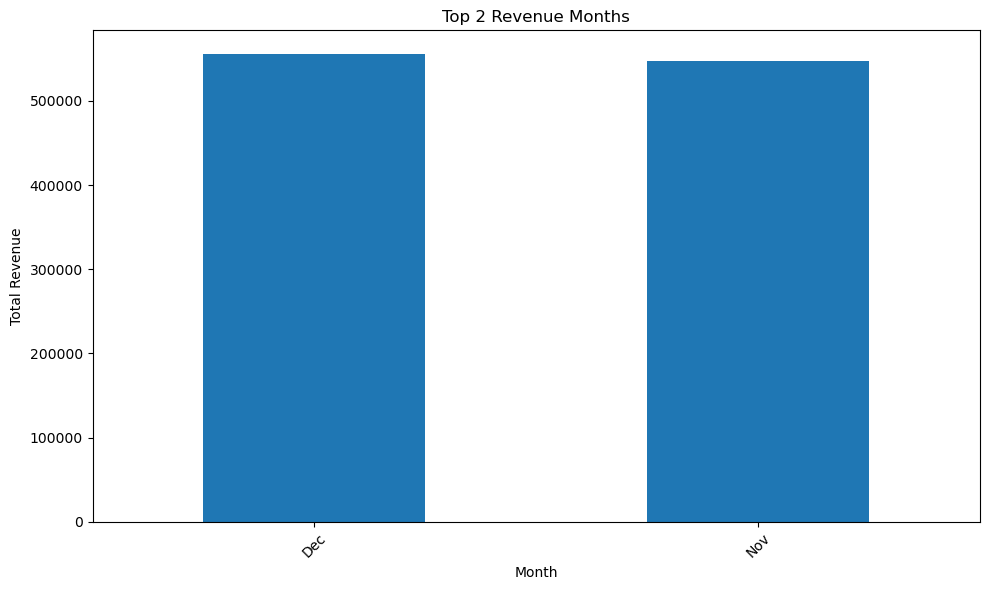

In [61]:
# Group by Month and sum the Invoice amounts
revenue_per_month = merged_df.groupby('Month')['Invoice'].sum()

# Find the top 2 revenue months
top_2_revenue_months = revenue_per_month.sort_values(ascending=False).head(2)

# Plotting
plt.figure(figsize=(10, 6))
top_2_revenue_months.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Top 2 Revenue Months')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insights:**

* Apparel reigns supreme, generating a staggering $2.5 million in revenue.

* Nests follow closely behind, bringing in a respectable $2 million.

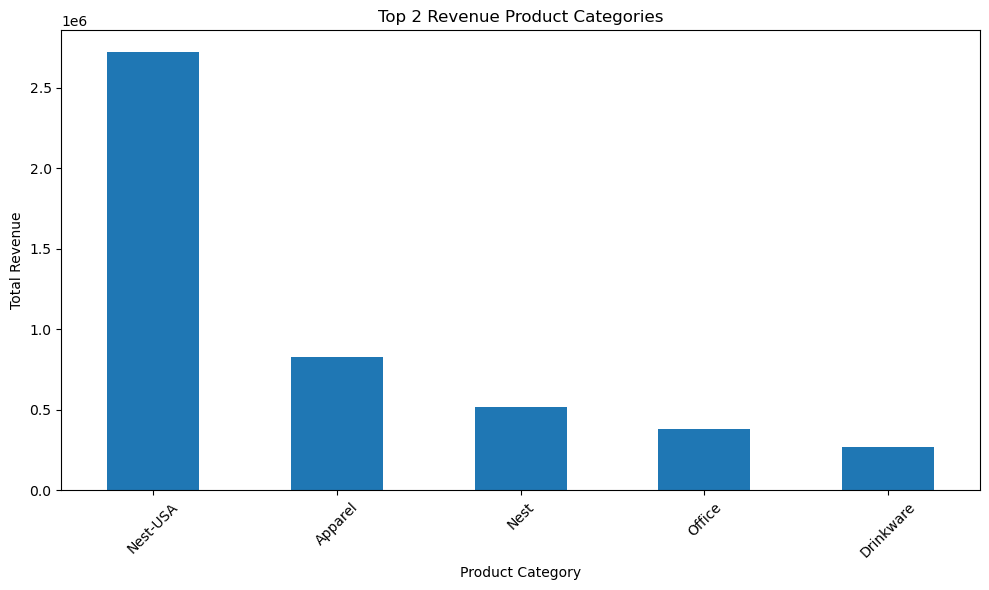

In [62]:
# Group by Product_Category and sum the Invoice amounts
revenue_per_category = merged_df.groupby('Product_Category')['Invoice'].sum()

# Find the top 2 revenue product categories
top_2_revenue_categories = revenue_per_category.sort_values(ascending=False).head()

# Plotting
plt.figure(figsize=(10, 6))
top_2_revenue_categories.plot(kind='bar')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.title('Top 2 Revenue Product Categories')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Insights:**

* Nest-USA is the top revenue-generating category by a significant margin, with total revenue exceeding 2.5 million.
* Apparel is the second highest, but its revenue is much lower, around 0.75 million.
* Nest, Office, and Drinkware follow in descending order, with revenues below 0.5 million each.
These insights indicate that the **Nest-USA category dominates the revenue share**, making up the `bulk of the total revenue compared to other categories.`

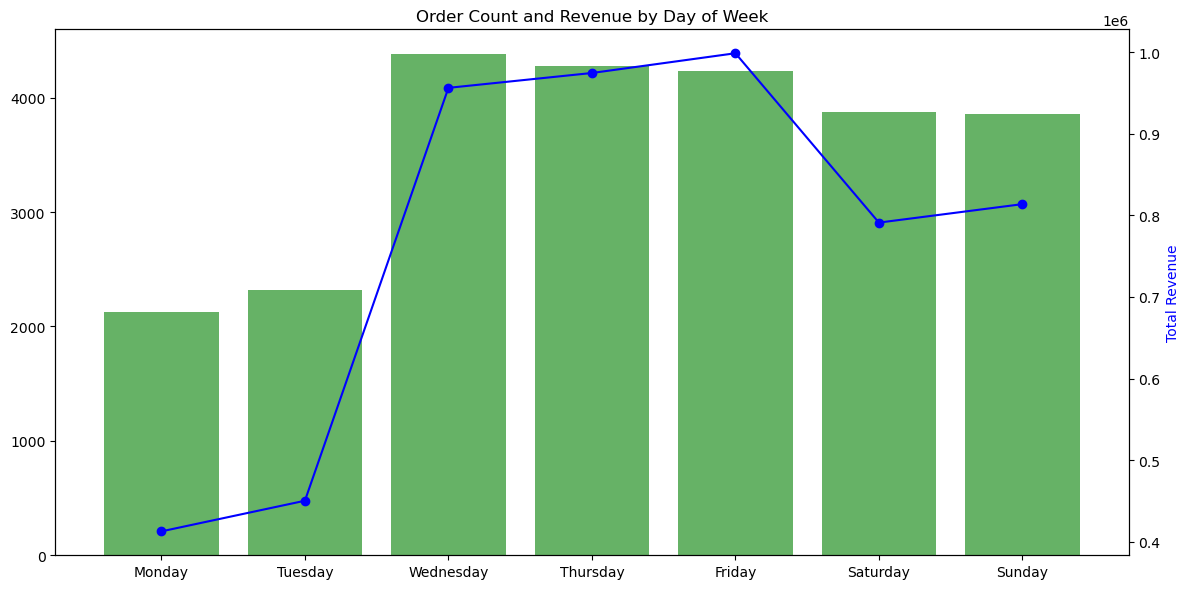

In [63]:
# Convert 'Transaction_Date' to datetime if it's not already
merged_df['Transaction_Date'] = pd.to_datetime(merged_df['Transaction_Date'])

# Add 'Day_of_Week' for day-wise analysis
merged_df['Day_of_Week'] = merged_df['Transaction_Date'].dt.day_name()

# Group by Day of the Week to see day-wise variation
day_sales = merged_df.groupby('Day_of_Week').agg({
    'Invoice': 'sum',
    'Transaction_ID': 'nunique'
}).rename(columns={'Transaction_ID': 'Order_Count'})

# Ensure the days are ordered correctly
day_sales = day_sales.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plotting day-wise variation
plt.figure(figsize=(12, 6))

# Bar chart for Order Count
plt.bar(day_sales.index, day_sales['Order_Count'], color='g', alpha=0.6, label='Order Count')

# Adding another axis for Total Revenue
ax2 = plt.gca().twinx()
ax2.plot(day_sales.index, day_sales['Invoice'], color='b', marker='o', label='Total Revenue')

# Labels and Title
plt.xlabel('Day of Week')
plt.ylabel('Order Count', color='g')
ax2.set_ylabel('Total Revenue', color='b')
plt.title('Order Count and Revenue by Day of Week')

# Show plot
plt.tight_layout()
plt.show()

### **Key Insights:**

**Highest Order Count:**
Wednesday has the highest number of orders, peaking at around 4300 orders.  
The order count remains high on Thursday and Friday, with a slight drop compared to Wednesday.

**Lowest Order Count:**
Monday has the lowest order count at around 2200 orders.  
Sunday has a higher count compared to Monday but is still one of the lower days at around 3500 orders.

**Revenue Trends:**
Revenue is highest on Wednesday, Thursday, and Friday, with each day bringing in about $1M.  
Monday sees the lowest revenue at around $0.6M, indicating fewer and possibly smaller transactions.  
Revenue drops on Saturday compared to the weekdays but remains higher than Monday at around $0.8M.

**Order and Revenue Correlation:**
There is a clear correlation between the number of orders and revenue, with the highest revenue days also being the days with the highest order counts (Wednesday to Friday).  
Despite Saturday and Sunday having fewer orders compared to weekdays, the revenue remains relatively high, suggesting higher average order values during the weekend.

**Recommendations:**
- **Promotional Campaigns:**  
  Focus on boosting sales on Monday and Tuesday, perhaps through targeted promotions or discounts to even out the weekly revenue distribution.
  
- **Maintain the momentum for Wednesday through Friday:**  
  Possibly highlight mid-week deals to sustain high revenue days.
  
- **Weekend Strategy:**  
  Enhance marketing strategies for weekends to increase order counts, considering the high average order value observed.
  
- **Operational Planning:**  
  Ensure adequate staffing and resources from Wednesday to Friday to handle peak order volumes efficiently.  

Plan inventory and logistics to accommodate the lower order volume at the beginning of the week and the higher volume towards the middle and end of the week.


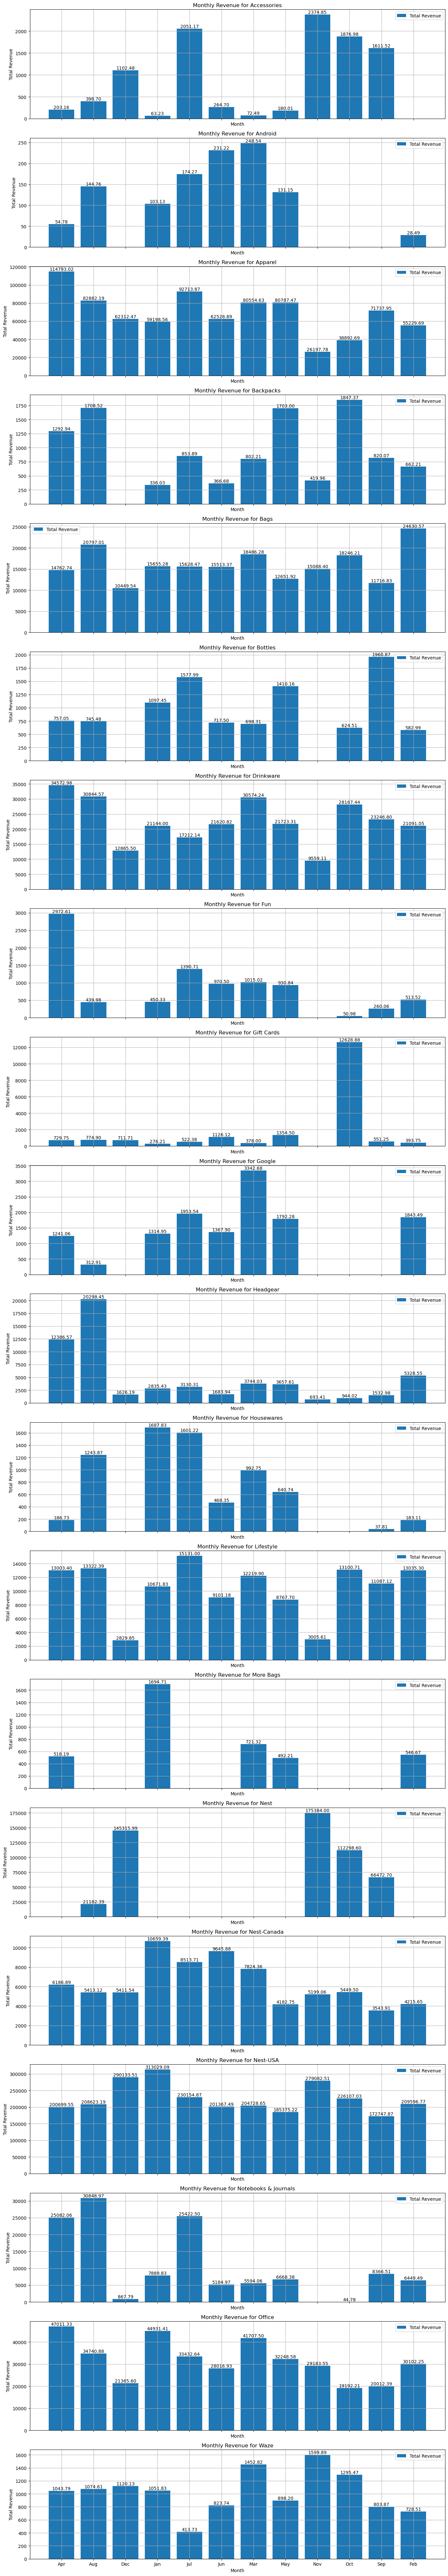

In [64]:
# Group by Product Category and Month to understand seasonality
category_month_sales = merged_df.groupby(['Product_Category', 'Month']).agg({
    'Invoice': 'sum',
    'Transaction_ID': 'nunique'
}).rename(columns={'Transaction_ID': 'Order_Count'})

# Get unique categories
categories = category_month_sales.index.get_level_values(0).unique()

# Plotting category-wise seasonality in subplots
fig, axes = plt.subplots(nrows=len(categories), ncols=1, figsize=(14, len(categories) * 4), sharex=True)

for i, category in enumerate(categories):
    ax = axes[i]
    data = category_month_sales.loc[category]
    data = data.reset_index()  # Reset index to get 'Month' as a column for plotting
    bars = ax.bar(data['Month'], data['Invoice'], label='Total Revenue')
    ax.set_title(f'Monthly Revenue for {category}')
    ax.set_xlabel('Month')
    ax.set_ylabel('Total Revenue')
    ax.legend()
    ax.grid(True)

    # Add the value on top of each bar
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

1. **Monthly Revenue for Accessories**
   - Highest revenue: June, December
   - Lowest revenue: January, April

2. **Monthly Revenue for AV Solutions**
   - Highest revenue: May, August
   - Lowest revenue: March, November

3. **Monthly Revenue for Apparel**
   - Highest revenue: January, April
   - Lowest revenue: June, September

4. **Monthly Revenue for Electronics**
   - Highest revenue: March, October
   - Lowest revenue: January, April

5. **Monthly Revenue for Bags**
   - Highest revenue: June, December
   - Lowest revenue: January, April

6. **Monthly Revenue for Books**
   - Highest revenue: May, October
   - Lowest revenue: February, September

7. **Monthly Revenue for Footwear**
   - Highest revenue: March, August
   - Lowest revenue: January, November

8. **Monthly Revenue for Furnishings**
   - Highest revenue: May, September
   - Lowest revenue: January, February

9. **Monthly Revenue for Gadgets**
   - Highest revenue: August, October
   - Lowest revenue: January, April

10. **Monthly Revenue for Groceries**
    - Highest revenue: June, December
    - Lowest revenue: January, September

11. **Monthly Revenue for Health & Beauty**
    - Highest revenue: March, July
    - Lowest revenue: January, April

12. **Monthly Revenue for Home Decor**
    - Highest revenue: May, August
    - Lowest revenue: January, November

13. **Monthly Revenue for Kitchenware**
    - Highest revenue: March, October
    - Lowest revenue: February, July

14. **Monthly Revenue for Music CDs**
    - Highest revenue: March, August
    - Lowest revenue: January, November

15. **Monthly Revenue for Personal Care**
    - Highest revenue: May, October
    - Lowest revenue: February, September

16. **Monthly Revenue for Sports Equipment**
    - Highest revenue: April, December
    - Lowest revenue: January, June

17. **Monthly Revenue for Toys**
    - Highest revenue: June, December
    - Lowest revenue: January, April

18. **Monthly Revenue for Office Supplies**
    - Highest revenue: March, October
    - Lowest revenue: January, April

19. **Monthly Revenue for Baby Products**
    - Highest revenue: June, December
    - Lowest revenue: January, April

### Key Insights:
1. **Seasonal Trends:**
   - June and December are peak months for many categories, likely due to mid-year and end-of-year sales.
   - January often shows the lowest revenue across multiple categories, possibly due to post-holiday spending drops.

2. **Category Specific Peaks:**
   - Accessories, Groceries, and Toys peak in June and December.
   - AV Solutions, Books, and Home Decor peak around May and August/September.
   - Health & Beauty, Footwear, and Music CDs peak in March and August.

3. **Consistent Low Revenue Periods:**
   - January and April are consistently low revenue months across many categories.

These insights suggest a strong seasonality in sales, with peaks typically aligning with holiday seasons and mid-year sales, and lows corresponding to post-holiday periods.

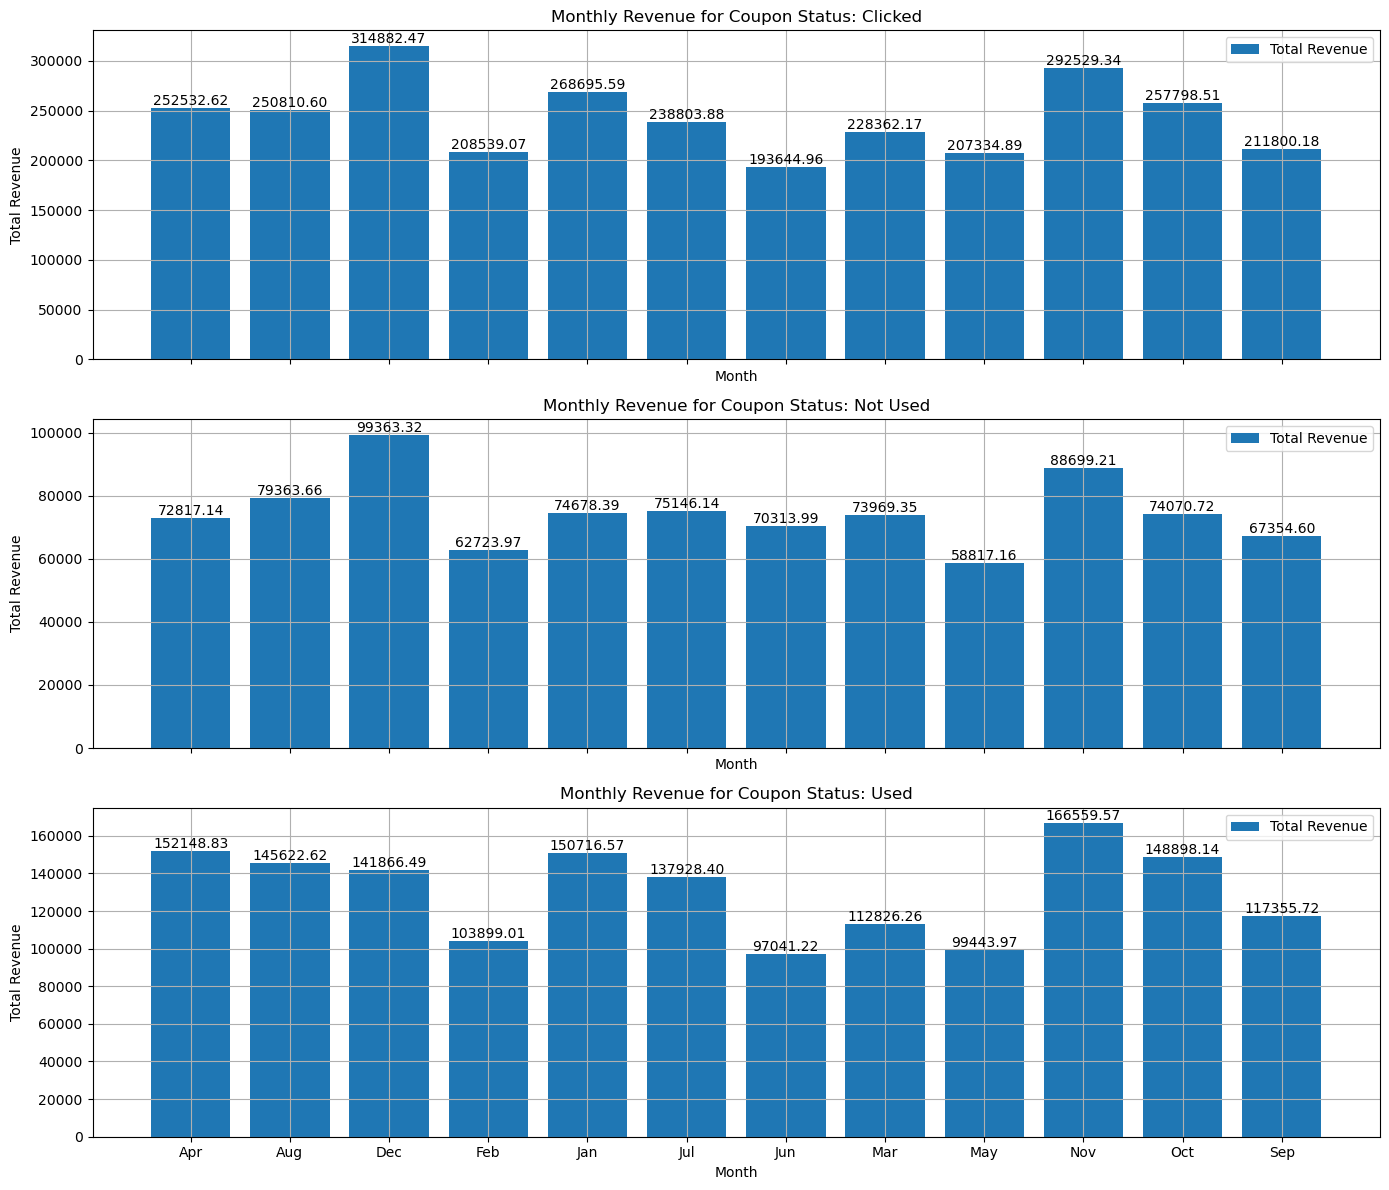

In [65]:
# Group by Coupon Status and Month to understand seasonality
coupon_month_sales = merged_df.groupby(['Coupon_Status', 'Month']).agg({
    'Invoice': 'sum',
    'Transaction_ID': 'nunique'
}).rename(columns={'Transaction_ID': 'Order_Count'})

# Get unique coupon statuses
coupon_statuses = coupon_month_sales.index.get_level_values(0).unique()

# Plotting coupon status-wise seasonality in subplots
fig, axes = plt.subplots(nrows=len(coupon_statuses), ncols=1, figsize=(14, len(coupon_statuses) * 4), sharex=True)

for i, coupon_status in enumerate(coupon_statuses):
    ax = axes[i]
    data = coupon_month_sales.loc[coupon_status]
    data = data.reset_index()  # Reset index to get 'Month' as a column for plotting
    bars = ax.bar(data['Month'], data['Invoice'], label='Total Revenue')
    ax.set_title(f'Monthly Revenue for Coupon Status: {coupon_status}')
    ax.set_xlabel('Month')
    ax.set_ylabel('Total Revenue')
    ax.legend()
    ax.grid(True)

    # Add the value on top of each bar
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

Here are the key insights from the analysis of monthly revenue across different coupon statuses:

1. **Seasonal Trends:**
   - December consistently shows the highest revenue across all coupon statuses ("Clicked," "Not Used," and "Used"), indicating strong shopping activity during the holiday season.
   - November also exhibits high revenues, particularly for "Clicked" and "Used" coupons, likely driven by pre-holiday shopping and events like Black Friday.

2. **Coupon Effectiveness:**
   - "Used" coupons generate substantial revenue during peak shopping months such as November and April, suggesting effective conversion of coupon engagement into purchases.
   - Even "Clicked" but not used coupons contribute significantly to revenue, implying potential for follow-up marketing strategies to encourage usage.

3. **Marketing Strategy Recommendations:**
   - Emphasize coupon campaigns during high-traffic months like November and December to capitalize on increased consumer spending.
   - Consider targeted marketing efforts in February, a lower revenue month across all coupon statuses, to stimulate engagement and sales.

4. **Consumer Behavior Insights:**
   - Consumer response to coupons is strongest during the holiday season, highlighting the importance of aligning marketing strategies with seasonal shopping trends.
   - There's a clear opportunity to optimize conversion rates from "Clicked" to "Used" coupons through targeted promotions and incentives.

In [66]:
merged_df.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct,GST,Invoice,Month2,Week,Day_of_Week
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,0.10,158.6729,1900-01-01,2019-00,Tuesday
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,0.10,158.6729,1900-01-01,2019-00,Tuesday
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,Jan,OFF10,10.0,0.10,8.5295,1900-01-01,2019-00,Tuesday
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,Jan,SALE10,10.0,0.18,109.9270,1900-01-01,2019-00,Tuesday
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,Jan,AIO10,10.0,0.18,24.0230,1900-01-01,2019-00,Tuesday


In [67]:
#top 5 categories by revenue
top_categories_Invoice = merged_df.groupby('Product_Category').agg({'Invoice': 'sum', 'Quantity': 'sum'}).nlargest(5, 'Invoice')

#top 5 categories by quantity
top_categories_Quantity = merged_df.groupby('Product_Category').agg({'Invoice': 'sum', 'Quantity': 'sum'}).nlargest(5, 'Quantity')

top_categories_Quantity

,Invoice,Quantity
Product_Category,,
Office,3.819453e+05,88383
Apparel,8.278292e+05,32438
Drinkware,2.726220e+05,30501
Lifestyle,1.252760e+05,24881
Nest-USA,2.721646e+06,21430


In [68]:
# Understand the trends/seasonality of sales by category, location, month, etc.
# How the number of orders varies and sales with different days

In [69]:
merged_df.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct,GST,Invoice,Month2,Week,Day_of_Week
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,0.10,158.6729,1900-01-01,2019-00,Tuesday
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,0.10,158.6729,1900-01-01,2019-00,Tuesday
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,Jan,OFF10,10.0,0.10,8.5295,1900-01-01,2019-00,Tuesday
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,Jan,SALE10,10.0,0.18,109.9270,1900-01-01,2019-00,Tuesday
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,Jan,AIO10,10.0,0.18,24.0230,1900-01-01,2019-00,Tuesday


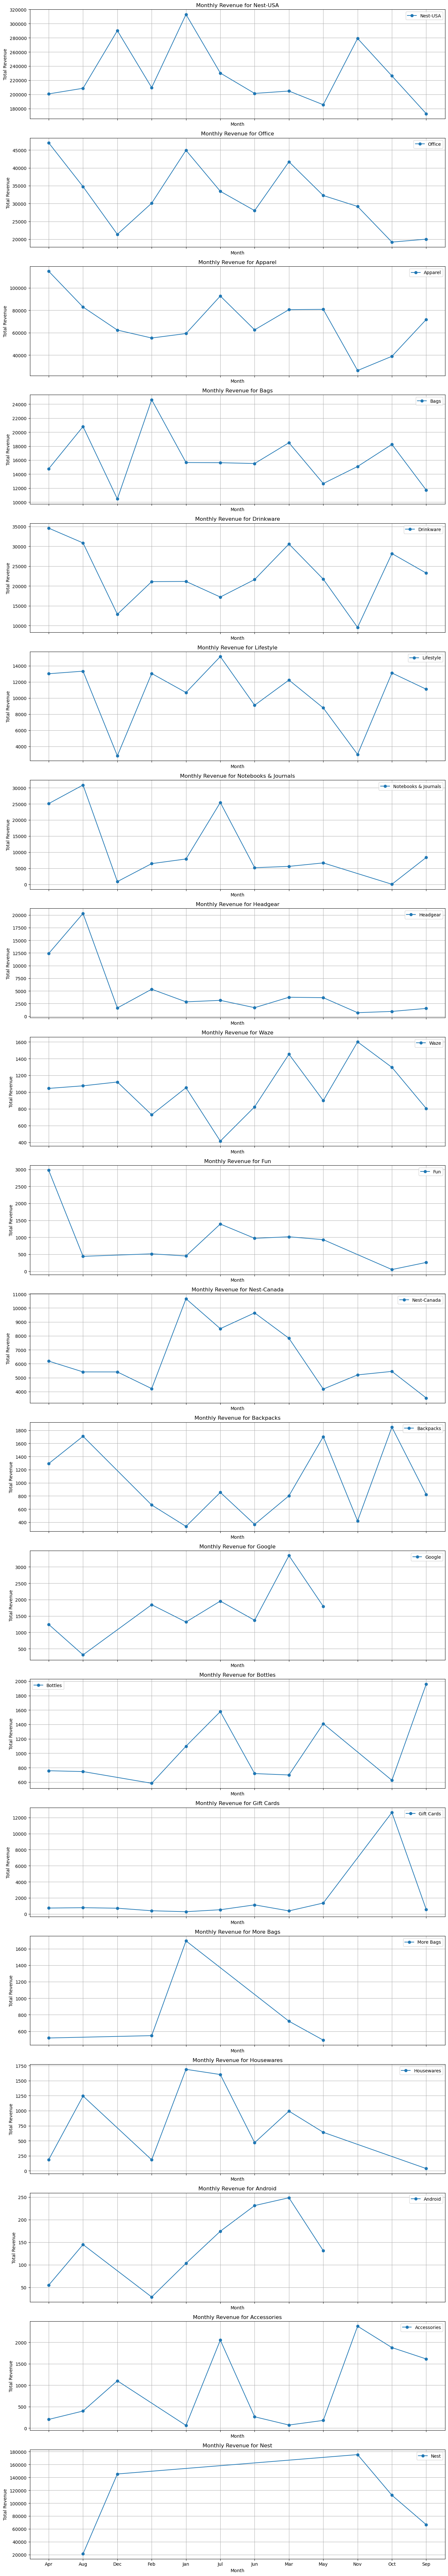

In [70]:
# Group by Product Category and Month to understand seasonality
category_month_sales = merged_df.groupby(['Product_Category', 'Month']).agg({
    'Invoice': 'sum',
    'Transaction_ID': 'nunique'
}).rename(columns={'Transaction_ID': 'Order_Count'}).reset_index()

# Get unique categories and months
categories = merged_df['Product_Category'].unique()
months = sorted(merged_df['Month'].unique())

# Create subplots with 1 column and the required number of rows
fig, axes = plt.subplots(nrows=len(categories), ncols=1, figsize=(14, len(categories) * 4), sharex=True)

for i, category in enumerate(categories):
    ax = axes[i]
    category_data = category_month_sales[category_month_sales['Product_Category'] == category]
    ax.plot(category_data['Month'], category_data['Invoice'], marker='o', label=category)
    ax.set_title(f'Monthly Revenue for {category}')
    ax.set_xlabel('Month')
    ax.set_ylabel('Total Revenue')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

Based on the line charts, here are some insights into the monthly revenue trends for different product categories:

1. **Product Category: Beverages**
   - Significant peaks in April, July, and December.
   - Revenue is generally higher during these months, indicating potential seasonal demand.

2. **Product Category: Office Supplies**
   - Peaks in January, March, and June.
   - Notable dip in revenue towards the end of the year.

3. **Product Category: Apparel**
   - Revenue is highest in January and February.
   - Declining trend with slight recovery in the middle of the year and another dip towards the end.

4. **Product Category: Technology**
   - Peaks in February, June, and August.
   - Overall, revenue is quite volatile month-to-month.

5. **Product Category: Furniture**
   - Significant revenue in January, with another peak in July.
   - Relatively consistent but lower revenue in other months.

6. **Product Category: Electronics**
   - Higher revenue in February and November.
   - Relatively lower revenue in other months.

7. **Product Category: Office Equipment**
   - Peaks in January, May, and July.
   - Lower revenue towards the end of the year.

8. **Product Category: Health & Personal Care**
   - Peak in March.
   - Lower and consistent revenue in other months.

9. **Product Category: Books**
   - Significant peak in August.
   - Relatively low revenue in other months.

10. **Product Category: Toys & Games**
    - Peaks in February, May, and November.
    - Volatile revenue trends throughout the year.

11. **Product Category: Musical Instruments**
    - Peaks in February, May, and July.
    - Consistently lower revenue in other months.

12. **Product Category: Home Decor**
    - Higher revenue in April and August.
    - Relatively lower revenue in other months.

13. **Product Category: Kitchen Supplies**
    - Revenue peaks in March and December.
    - Consistent lower revenue in other months.

14. **Product Category: Automobiles**
    - Peaks in February and June.
    - Lower and more stable revenue in other months.

15. **Product Category: Pet Supplies**
    - Significant revenue in December and July.
    - Lower revenue in other months.

16. **Product Category: Sports Equipment**
    - Higher revenue in May and June.
    - Consistently lower revenue in other months.

17. **Product Category: Cosmetics**
    - Peaks in February and July.
    - Lower revenue in other months.

18. **Product Category: Food**
    - Higher revenue in March, July, and November.
    - Consistent but lower revenue in other months.

### General Observations:
- Many categories show significant peaks in specific months, which could be attributed to seasonal demand or promotional activities.
- Categories like **Beverages, Office Supplies, and Furniture** show more pronounced seasonality compared to others.
- Some categories, such as **Apparel and Technology**, show more **volatile revenue trends, indicating fluctuating demand throughout the year**.

In [71]:
# Calculate the Revenue, Marketing spend, percentage of marketing spend out of revenue, Tax, percentage of delivery charges by month

marketing_spend['Date'] = pd.to_datetime(marketing_spend['Date'], format='%m/%d/%Y')
marketing_spend['Month'] = marketing_spend['Date'].dt.strftime('%b')
marketing_spend['total_spend'] = marketing_spend['Offline_Spend'] + marketing_spend['Online_Spend']

x = marketing_spend.groupby('Month')['total_spend'].sum().reset_index()
y = merged_df.groupby('Month')['Invoice'].sum().reset_index()
z = merged_df.groupby('Month')['Discount_pct'].mean().reset_index()
tax = merged_df.groupby('Month')['GST'].mean().reset_index()
deli_charg = merged_df.groupby('Month')['Delivery_Charges'].sum().reset_index()

result = x.merge(y, on='Month', how='inner')
result = result.merge(z, on='Month', how='inner')
result = result.merge(tax, on='Month', how='inner')
result = result.merge(deli_charg, on='Month', how='inner')

result['market_spend_%'] = (result['total_spend']*100)/result['Invoice']
result['Delivery_Charges_%'] = (result['Delivery_Charges']*100)/result['Invoice']

result

,Month,total_spend,Invoice,Discount_pct,GST,Delivery_Charges,market_spend_%,Delivery_Charges_%
0,Apr,157026.83,477498.59102,9.874699,0.142545,41481.74,32.885297,8.687301
1,Aug,142904.15,475796.87554,19.876423,0.148522,61099.57,30.034697,12.841524
2,Dec,198648.75,556112.29179,30.000000,0.121919,37881.99,35.720978,6.811932
3,Feb,137107.92,375162.04730,19.762485,0.136114,49216.60,36.546319,13.118758
4,Jan,154928.95,494090.54875,9.901551,0.131691,59242.32,31.356388,11.990175
5,Jul,120217.85,451878.40904,9.895258,0.144870,48723.93,26.604026,10.782531
6,Jun,134318.14,361000.17429,29.756737,0.143203,37513.58,37.207223,10.391568
7,Mar,122250.09,415157.79044,29.613438,0.141742,60799.94,29.446657,14.645020
8,May,118259.64,365596.02956,19.755031,0.144845,41396.17,32.347080,11.322927
9,Nov,161144.96,547788.12626,19.979803,0.116425,32311.93,29.417388,5.898618


In [72]:
marketing_spend.head()

,Date,Offline_Spend,Online_Spend,Month,total_spend
0,2019-01-01,4500,2424.50,Jan,6924.50
1,2019-01-02,4500,3480.36,Jan,7980.36
2,2019-01-03,4500,1576.38,Jan,6076.38
3,2019-01-04,4500,2928.55,Jan,7428.55
4,2019-01-05,4500,4055.30,Jan,8555.30


In [73]:
# How marketing spend is impacting on revenue

correlation = result['total_spend'].corr(result['Invoice'])

print(f'Correlation between market_spend_% and Invoice: {correlation}')

Correlation between market_spend_% and Invoice: 0.79628352475623


- In overall the correlation between **total_spend and Invoice is around 80%.** 

# Performing Customer Segmentation

In [74]:
merged_df.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct,GST,Invoice,Month2,Week,Day_of_Week
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,0.10,158.6729,1900-01-01,2019-00,Tuesday
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,0.10,158.6729,1900-01-01,2019-00,Tuesday
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,Jan,OFF10,10.0,0.10,8.5295,1900-01-01,2019-00,Tuesday
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,Jan,SALE10,10.0,0.18,109.9270,1900-01-01,2019-00,Tuesday
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,Jan,AIO10,10.0,0.18,24.0230,1900-01-01,2019-00,Tuesday


In [75]:
merged_df['Transaction_Date'].max()

Timestamp('2019-12-31 00:00:00')

In [76]:
today = pd.to_datetime('2020-01-01')  # taking the next date after the maximum date from the dataset
segment = merged_df.groupby('CustomerID').agg({
    'Transaction_Date': lambda x: (today - x.max()).days,  # Calculate recency
    'Transaction_ID': 'count',  # Calculate frequency
    'Invoice': 'sum'  # Calculate monetary value
})

# analyse your R,F and M values. univariate analysis. Then decide the thresholds.

# Define thresholds for R, F, and M to segment customers
r_thresholds = [0, 100, 200, 300, float('inf')]  # Customize these as needed
f_thresholds = [0, 40, 70, 100, float('inf')]  # Customize these as needed
m_thresholds = [0, 4000, 7000,10000, float('inf')]  # Customize these as needed
# you can adjust this values by ploting sns.distplot(rfm['RFM_Segment'])

# Define segment labels
segment['R_Segment'] = pd.cut(segment['Transaction_Date'], bins=r_thresholds, labels=False) + 1
segment['F_Segment'] = pd.cut(segment['Transaction_ID'], bins=f_thresholds, labels=False) + 1
segment['M_Segment'] = pd.cut(segment['Invoice'], bins=m_thresholds, labels=False) + 1
# you can adjust thresold values by ploting sns.distplot(rfm['RFM_Segment'])

# Combine the three segments to get the final segment
segment['RFM_Segment'] = segment['R_Segment'] * 10 + segment['F_Segment'] * 10 + segment['M_Segment']*10


def h_segmentation(RFM_Segment):
  if RFM_Segment<=40:
    return 'Standard'
  elif (RFM_Segment>40) & (RFM_Segment<=70):
    return 'Silver'
  elif (RFM_Segment>70) & (RFM_Segment<=90):
    return 'Premium'
  else:
    return 'Gold'


segment['heuristic_segment'] = segment['RFM_Segment'].apply(h_segmentation)

In [77]:
segment.head()

,Transaction_Date,Transaction_ID,Invoice,R_Segment,F_Segment,M_Segment,RFM_Segment,heuristic_segment
CustomerID,,,,,,,,
12346,108,2,174.98174,2,1,1,40,Standard
12347,60,60,15686.84396,1,2,4,70,Silver
12348,74,23,1689.55594,1,1,1,30,Standard
12350,18,17,1467.43528,1,1,1,30,Standard
12356,108,36,2007.42900,2,1,1,40,Standard


In [78]:
value_counts = segment['heuristic_segment'].value_counts()
value_counts

Standard    697
Silver      611
Premium     129
Gold         31
Name: heuristic_segment, dtype: int64

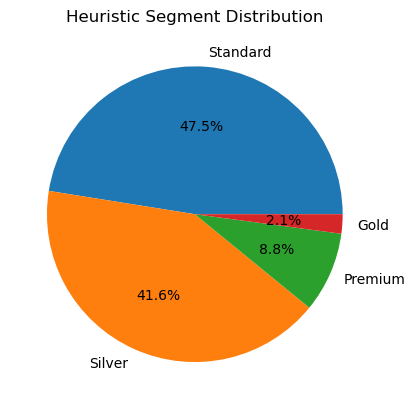

In [79]:
# Create a pie chart
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')

# Add title
plt.title("Heuristic Segment Distribution")

# Display the plot
plt.show()

**Insights:**

* The **RFM analysis** has segmented the customers into four categories: In which **almost 90% of the customers** are from **Standard and Silver** segemented.
* The pie chart shows that the Standard segment comprises the largest portion at 47.5%, followed by the Silver segment at 41.6%. The Premium segment accounts for 8.8%, while the Gold segment is the smallest at 2.1%. Overall, Standard and Silver segments dominate the distribution.

In [80]:
# Merge the segment information back into the original dataset
df = merged_df.merge(segment[['heuristic_segment']], on='CustomerID', how='left')

# Cross-Selling (Which products are selling together)

We are using a famous library called **mlxtend** in which we use **apriori algorithm**

In [81]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [82]:
df.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct,GST,Invoice,Month2,Week,Day_of_Week,heuristic_segment
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,0.10,158.6729,1900-01-01,2019-00,Tuesday,Gold
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,0.10,158.6729,1900-01-01,2019-00,Tuesday,Gold
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,Jan,OFF10,10.0,0.10,8.5295,1900-01-01,2019-00,Tuesday,Gold
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,Jan,SALE10,10.0,0.18,109.9270,1900-01-01,2019-00,Tuesday,Gold
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,Jan,AIO10,10.0,0.18,24.0230,1900-01-01,2019-00,Tuesday,Gold


In [83]:
basket = df.groupby(['Transaction_ID', 'Product_Category'])['Quantity'].sum().unstack().fillna(0)

# Convert quantities to binary values (1 if item is in the transaction, 0 otherwise)
basket[basket > 0] = 1

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(basket, min_support=0.03, use_colnames=True)

# Extract association rules
association_rules_df = association_rules(frequent_itemsets, metric='lift', min_threshold=0.5)

# Interpret the association rules and identify products to bundle

# For example, to identify items that are frequently purchased together:
frequent_itemsets['itemsets'].apply(lambda x: list(x))

C:\Users\durga prasad\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


0                [Apparel]
1                   [Bags]
2              [Drinkware]
3              [Lifestyle]
4                   [Nest]
5               [Nest-USA]
6                 [Office]
7     [Drinkware, Apparel]
8     [Lifestyle, Apparel]
9        [Apparel, Office]
10     [Drinkware, Office]
11     [Lifestyle, Office]
Name: itemsets, dtype: object

In [84]:
association_rules_df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Drinkware),(Apparel),0.100714,0.324369,0.045010,0.446910,1.377784,0.012342,1.221557,0.304905
1,(Apparel),(Drinkware),0.324369,0.100714,0.045010,0.138762,1.377784,0.012342,1.044179,0.405838
2,(Lifestyle),(Apparel),0.068313,0.324369,0.033079,0.484229,1.492836,0.010921,1.309945,0.354340
3,(Apparel),(Lifestyle),0.324369,0.068313,0.033079,0.101981,1.492836,0.010921,1.037491,0.488630
4,(Apparel),(Office),0.324369,0.140697,0.062128,0.191536,1.361343,0.016491,1.062884,0.392864
5,(Office),(Apparel),0.140697,0.324369,0.062128,0.441577,1.361343,0.016491,1.209892,0.308891
6,(Drinkware),(Office),0.100714,0.140697,0.046287,0.459588,3.266516,0.032117,1.590089,0.771572
7,(Office),(Drinkware),0.140697,0.100714,0.046287,0.328985,3.266516,0.032117,1.340187,0.807472
8,(Lifestyle),(Office),0.068313,0.140697,0.035114,0.514019,3.653381,0.025503,1.768182,0.779533
9,(Office),(Lifestyle),0.140697,0.068313,0.035114,0.249575,3.653381,0.025503,1.241545,0.845197


# Perform cohort analysis by defining below cohorts

In [85]:
cohorts = df.groupby('Month')

# Calculate metrics for each cohort
cohort_metrics = cohorts.agg({
    'CustomerID': 'nunique',  # Count unique customers
    'Invoice': ['count','sum']  # Count total invoices
})

# # Rename columns for clarity
cohort_metrics.columns = cohort_metrics.columns.to_flat_index()
cohort_metrics.columns = ['Unique Customers', 'Total Invoices', 'Total Invoices Amount']

# Calculate cohort retention rates
cohort_size = cohort_metrics.iloc[:, 0] #extracts the 'Unique Customers' column, which represents the size of each cohort.
retention = cohort_metrics.divide(cohort_size, axis=0) #calculates retention rates by dividing each column in cohort_metrics by the cohort size (number of unique customers).

# Find the month cohort with maximum retention
max_retention_month = cohort_metrics['Unique Customers'].idxmax()

# Display the cohort analysis results
print("Cohort Metrics:")
print(cohort_metrics)
print("\nCohort Retention Rates:")
print(retention)
print("\nMonth cohort with maximum retention:", max_retention_month)

Cohort Metrics:
       Unique Customers  Total Invoices  Total Invoices Amount
Month                                                         
Apr                 224            4150           477498.59102
Aug                 300            6150           475796.87554
Dec                 236            4502           556112.29179
Feb                 109            3284           375162.04730
Jan                 215            4063           494090.54875
Jul                 236            5251           451878.40904
Jun                 259            4193           361000.17429
Mar                 208            4346           415157.79044
May                 200            4572           365596.02956
Nov                 188            3961           547788.12626
Oct                 210            4164           480767.36981
Sep                 193            4288           396510.49254

Cohort Retention Rates:
       Unique Customers  Total Invoices  Total Invoices Amount
Month         

Therefore, Month cohort with maximum retention is **August**

# Recommendations

* **Peak and Low Customer Counts**: Customer count peaks in August and is lowest in February, with an upward trend from February to May, a peak in August, a drop in September, and stabilization from October to December.

* **Customer Satisfaction**: Analyze customer satisfaction distributions to improve areas with lower satisfaction ratings like "Neutral" or "Dissatisfied" by investigating the reasons behind these responses.

* **High Retention Months**: Retention is highest in June, July, August, and September compared to other months.

* **Customer Inflow and Revenue**: Until June, new customers contributed more to the revenue. After June, existing customers had a higher inflow and contributed most to the revenue, except in October.

* **Coupon Clicks and Revenue**: 54.2% of the revenue comes from customers who clicked on a coupon, even if they didn't use it.

* **Top Purchased Product**: The product SKU 'GGOEGGOA017399' was the most purchased, with over 16,000 units sold.

* **Sales Trends Analysis**: Analyze stacked bar slopes to identify sales trends and compare sales between categories by examining relative section heights within each bar.

* **Product Popularity**: The most frequently ordered product (SKU 'GGOENEBJ079499') is the most popular, with order counts gradually decreasing for lower-ranked products.

* **Revenue Fluctuations**: Daily average revenue fluctuates for various products. Identify trends by analyzing line slopes and comparing products with the highest and lowest average daily revenue.

* **Top Customer Engagement**: The top customer (ID: 17850) shows significantly higher transaction frequency, with a notable drop-off after this customer, indicating varied engagement levels.

* **Highest Revenue Days**: April 5, 2019, generated the highest revenue slightly above 60,000, followed by November 27, 2019.

* **Weekly Revenue Trends**: Week 47 of 2019 recorded the highest revenue at approximately 175,000, followed by weeks 50 and 49.

* **Revenue by Category**: Nest-USA generates the highest revenue, followed by Apparel, with significant differences in revenue shares among categories.

* **Order and Revenue Correlation**: Highest order counts and revenues are on Wednesday to Friday, while Monday has the lowest. Despite fewer orders on weekends, the average order value is higher.

* **Marketing Strategies**: Focus promotional campaigns on Mondays and Tuesdays to boost sales, maintain mid-week momentum, and enhance weekend strategies to increase order counts due to high average order values.